# 利用S&P500 Adj Close預測台灣大盤指數Adj Close

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# 讀入2015/04/30 ~ 2019/04/29 台灣大盤指數，成為一個pandas dataframe
# index_col = 'Date'代表我們把Date指定成index，也就是我們dataframe的索引
# parse_dates = True代表讓日期轉成python裡面的datetime object
tw_weighted = pd.read_csv('TSEC_weighted_index.csv', index_col='Date', parse_dates=True) # 2015/04/30 ~ 2019/04/29

In [3]:
tw_weighted.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-30,9841.150391,9894.900391,9820.049805,9820.049805,9820.012695,2644700.0
2015-05-04,9853.509766,9871.650391,9800.480469,9845.040039,9845.002930,2298800.0
2015-05-05,9849.129883,9855.639648,9788.129883,9820.129883,9820.092773,2134800.0
2015-05-06,9780.389648,9829.429688,9735.940430,9818.200195,9818.163086,2353700.0
2015-05-07,9789.820313,9789.820313,9704.110352,9704.110352,9704.073242,2315900.0


In [4]:
tw_weighted_adjclose_volume = tw_weighted[['Adj Close','Volume']] # slice出調整後收盤價跟交易量

In [5]:
tw_weighted_adjclose_volume.head()

,Adj Close,Volume
Date,,
2015-04-30,9820.012695,2644700.0
2015-05-04,9845.002930,2298800.0
2015-05-05,9820.092773,2134800.0
2015-05-06,9818.163086,2353700.0
2015-05-07,9704.073242,2315900.0


In [6]:
sp500 = pd.read_csv('^GSPC.csv',index_col='Date', parse_dates=True) # 2015/04/29 - 2019/04/26

In [7]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-29,2112.489990,2113.649902,2097.409912,2106.850098,2106.850098,4074970000
2015-04-30,2105.520020,2105.520020,2077.590088,2085.510010,2085.510010,4509680000
2015-05-01,2087.379883,2108.409912,2087.379883,2108.290039,2108.290039,3379390000
2015-05-04,2110.229980,2120.949951,2110.229980,2114.489990,2114.489990,3091580000
2015-05-05,2112.629883,2115.239990,2088.459961,2089.459961,2089.459961,3793950000


In [8]:
sp500_adjclose_volume = sp500[['Adj Close','Volume']] # slice出調整後收盤價跟交易量

In [9]:
sp500_adjclose_volume.head()

,Adj Close,Volume
Date,,
2015-04-29,2106.850098,4074970000
2015-04-30,2085.510010,4509680000
2015-05-01,2108.290039,3379390000
2015-05-04,2114.489990,3091580000
2015-05-05,2089.459961,3793950000


In [10]:
# 為了讓兩組data的日期可以match，先把兩組dataframe用inner join的方式弄成一個大的dataframe--> newdf
newdf = pd.merge(tw_weighted_adjclose_volume, sp500_adjclose_volume, on='Date', how='inner')
newdf = newdf.dropna() # drop null value
newdf = newdf.drop(newdf.index[940]) # 因為下面的s&p500要用t-1的時間來預測台股大盤t，所以會差一筆，把最後一筆弄掉

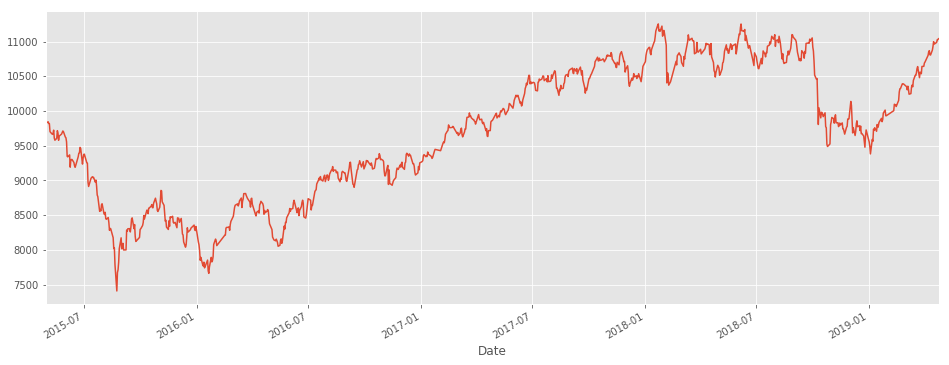

In [11]:
newdf['Adj Close_x'].plot(figsize=(16,6))

### Rolling Mean for tw weighted index

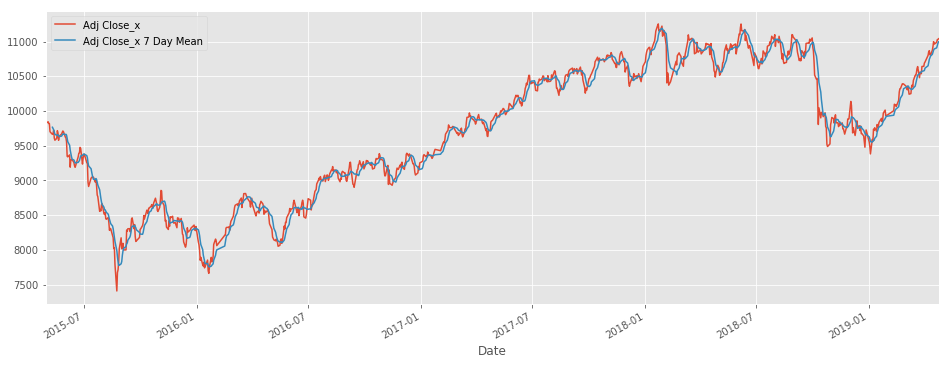

In [13]:
newdf['Adj Close_x 7 Day Mean'] = newdf['Adj Close_x'].rolling(window=7).mean()
newdf[['Adj Close_x','Adj Close_x 7 Day Mean']].plot(figsize=(16,6))

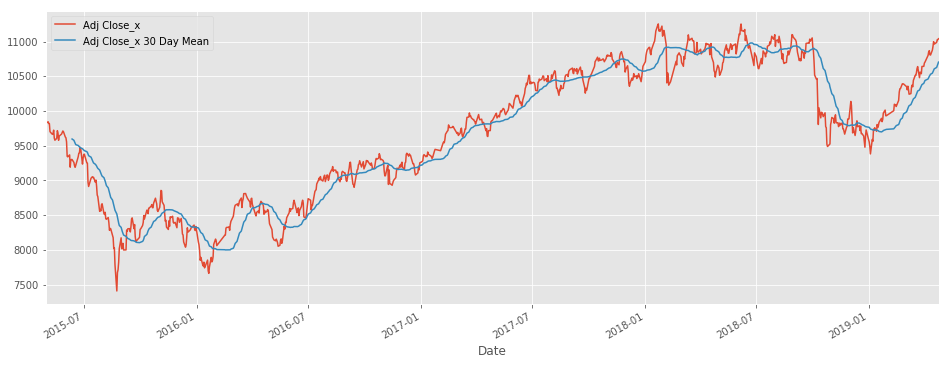

In [14]:
newdf['Adj Close_x 30 Day Mean'] = newdf['Adj Close_x'].rolling(window=30).mean()
newdf[['Adj Close_x','Adj Close_x 30 Day Mean']].plot(figsize=(16,6))

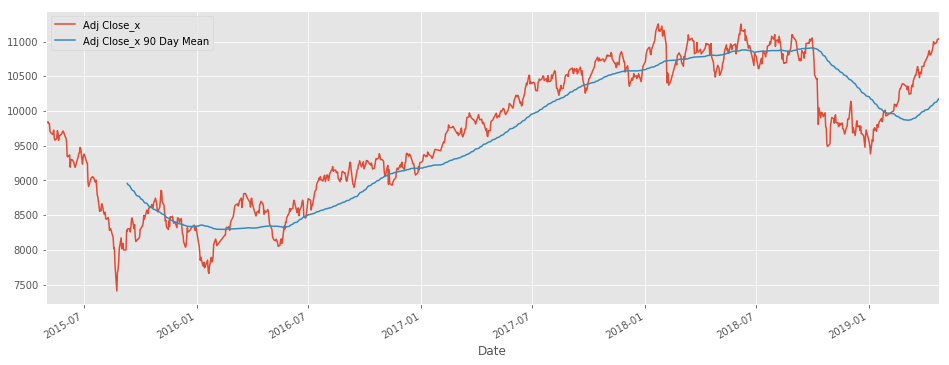

In [15]:
newdf['Adj Close_x 90 Day Mean'] = newdf['Adj Close_x'].rolling(window=90).mean()
newdf[['Adj Close_x','Adj Close_x 90 Day Mean']].plot(figsize=(16,6))

In [16]:
newdf = newdf.dropna()
newdf.head()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y,Adj Close_x 7 Day Mean,Adj Close_x 30 Day Mean,Adj Close_x 90 Day Mean
Date,,,,,,,
2015-09-10,8268.647461,2036300.0,1952.290039,3626320000,8100.897391,8176.765137,8958.322396
2015-09-11,8305.788086,1841800.0,1961.050049,3218590000,8142.077218,8165.242806,8941.497678
2015-09-14,8307.257813,1769100.0,1953.030029,3000200000,8180.934152,8153.307813,8924.411621
2015-09-15,8259.958008,1622000.0,1978.089966,3239860000,8204.368234,8144.493815,8907.076790
2015-09-16,8333.257813,1864800.0,1995.310059,3630680000,8251.895159,8138.574805,8890.577843


In [17]:
# newdf_for_sp500_shifting的用意：為了做「時間t-1的平移」
# 如同newdf，為了讓日期可以match，所以merge成一個大的newdf_for_sp500_shifting
newdf_for_sp500_shifting = pd.merge(tw_weighted_adjclose_volume, sp500_adjclose_volume, on='Date', how='inner')
newdf_for_sp500_shifting = newdf_for_sp500_shifting.shift(periods=-1) # 時間t-1的平移
newdf_for_sp500_shifting = newdf_for_sp500_shifting.dropna() # drop null value

In [18]:
newdf_for_sp500_shifting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2015-04-30 to 2019-04-25
Data columns (total 4 columns):
Adj Close_x    940 non-null float64
Volume_x       940 non-null float64
Adj Close_y    940 non-null float64
Volume_y       940 non-null float64
dtypes: float64(4)
memory usage: 36.7 KB


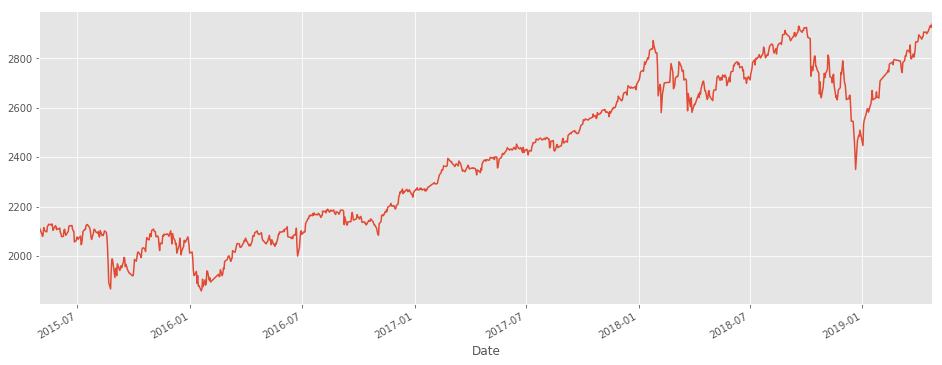

In [19]:
newdf_for_sp500_shifting['Adj Close_y'].plot(figsize=(16,6))

### Rolling Mean for S&P 500 adj close

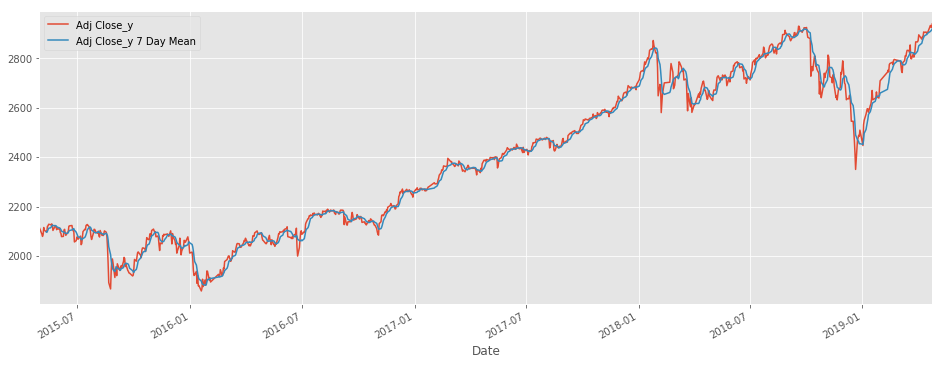

In [20]:
newdf_for_sp500_shifting['Adj Close_y 7 Day Mean'] = newdf_for_sp500_shifting['Adj Close_y'].rolling(window=7).mean()
newdf_for_sp500_shifting[['Adj Close_y','Adj Close_y 7 Day Mean']].plot(figsize=(16,6))

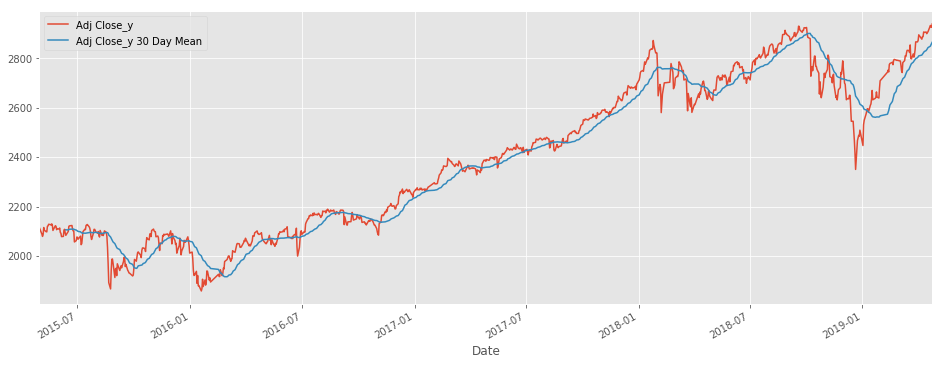

In [21]:
newdf_for_sp500_shifting['Adj Close_y 30 Day Mean'] = newdf_for_sp500_shifting['Adj Close_y'].rolling(window=30).mean()
newdf_for_sp500_shifting[['Adj Close_y','Adj Close_y 30 Day Mean']].plot(figsize=(16,6))

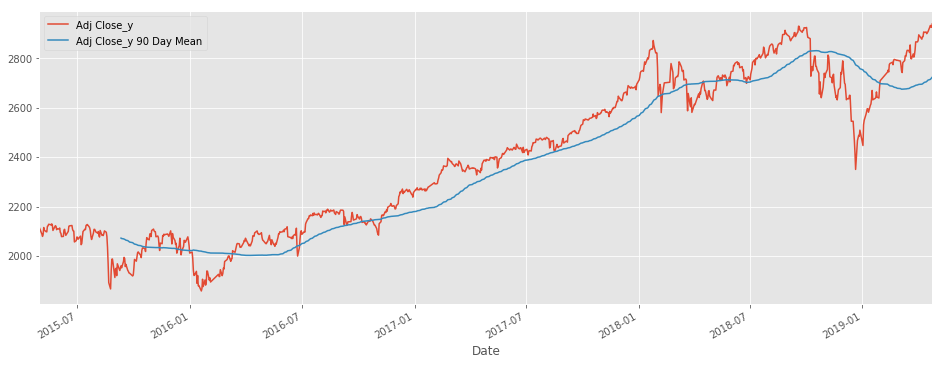

In [22]:
newdf_for_sp500_shifting['Adj Close_y 90 Day Mean'] = newdf_for_sp500_shifting['Adj Close_y'].rolling(window=90).mean()
newdf_for_sp500_shifting[['Adj Close_y','Adj Close_y 90 Day Mean']].plot(figsize=(16,6))

In [23]:
newdf_for_sp500_shifting = newdf_for_sp500_shifting.dropna()
newdf_for_sp500_shifting.head()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y,Adj Close_y 7 Day Mean,Adj Close_y 30 Day Mean,Adj Close_y 90 Day Mean
Date,,,,,,,
2015-09-10,8305.788086,1841800.0,1961.050049,3.218590e+09,1949.428589,2016.696016,2073.293454
2015-09-11,8307.257813,1769100.0,1953.030029,3.000200e+09,1950.024309,2011.669014,2071.499455
2015-09-14,8259.958008,1622000.0,1978.089966,3.239860e+09,1953.875732,2007.670679,2070.262010
2015-09-15,8333.257813,1864800.0,1995.310059,3.630680e+09,1964.460031,2004.403678,2069.319345
2015-09-16,8445.467773,2321600.0,1990.199951,4.183790e+09,1967.430019,2000.749007,2068.232678


In [24]:
newdf_for_sp500_shifting.head()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y,Adj Close_y 7 Day Mean,Adj Close_y 30 Day Mean,Adj Close_y 90 Day Mean
Date,,,,,,,
2015-09-10,8305.788086,1841800.0,1961.050049,3.218590e+09,1949.428589,2016.696016,2073.293454
2015-09-11,8307.257813,1769100.0,1953.030029,3.000200e+09,1950.024309,2011.669014,2071.499455
2015-09-14,8259.958008,1622000.0,1978.089966,3.239860e+09,1953.875732,2007.670679,2070.262010
2015-09-15,8333.257813,1864800.0,1995.310059,3.630680e+09,1964.460031,2004.403678,2069.319345
2015-09-16,8445.467773,2321600.0,1990.199951,4.183790e+09,1967.430019,2000.749007,2068.232678


In [25]:
newdf.head()

,Adj Close_x,Volume_x,Adj Close_y,Volume_y,Adj Close_x 7 Day Mean,Adj Close_x 30 Day Mean,Adj Close_x 90 Day Mean
Date,,,,,,,
2015-09-10,8268.647461,2036300.0,1952.290039,3626320000,8100.897391,8176.765137,8958.322396
2015-09-11,8305.788086,1841800.0,1961.050049,3218590000,8142.077218,8165.242806,8941.497678
2015-09-14,8307.257813,1769100.0,1953.030029,3000200000,8180.934152,8153.307813,8924.411621
2015-09-15,8259.958008,1622000.0,1978.089966,3239860000,8204.368234,8144.493815,8907.076790
2015-09-16,8333.257813,1864800.0,1995.310059,3630680000,8251.895159,8138.574805,8890.577843


### 目標：利用S&P 500的Adj Close(time=t-1)當feature，台股大盤加權指數Adj Close(time = t)當target

In [26]:
#把dataframe對應的column資料切出來
X = newdf_for_sp500_shifting.iloc[:, 2].values # s&p500 adj close price
y = newdf.iloc[:, 0].values # tw weighted index adj close price
X_rolling_mean_7 = newdf_for_sp500_shifting.iloc[:, 4]
y_rolling_mean_7 = newdf.iloc[:, 4]

In [27]:
X.shape

(851,)

In [28]:
y.shape

(851,)

In [29]:
X_rolling_mean_7.shape

(851,)

In [30]:
y_rolling_mean_7.shape

(851,)

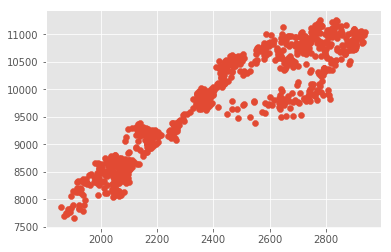

In [31]:
plt.scatter(X,y)

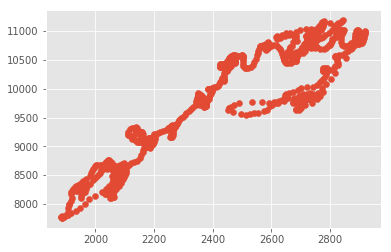

In [32]:
plt.scatter(X_rolling_mean_7, y_rolling_mean_7)

In [33]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145] TEST: [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242

In [34]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_rolling_mean_7, X_test_rolling_mean_7 = X_rolling_mean_7[train_index], X_rolling_mean_7[test_index]
    y_train_rolling_mean_7, y_test_rolling_mean_7 = y_rolling_mean_7[train_index], y_rolling_mean_7[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145] TEST: [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242

In [35]:
# Fitting Lineaer Regressioin to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
X_train_rolling_mean_7 = X_train_rolling_mean_7.values.reshape(-1,1)
lin_reg.fit(X_train, y_train)
lin_reg.fit(X_train_rolling_mean_7, y_train_rolling_mean_7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2)
pipeline = Pipeline(
    [('poly', poly),('lin reg', lin_reg)]
)
pipeline_rolling_mean = Pipeline(
    [('poly', poly),('lin reg', lin_reg)]
)

In [37]:
pipeline.fit(X_train,y_train)
pipeline_rolling_mean.fit(X_train_rolling_mean_7, y_train_rolling_mean_7)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lin reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### 利用S&P 500 polynomial (degree=2) 估計台股大盤指數

In [38]:
X_test = X_test.reshape(-1,1)
X_test_rolling_mean_7 = X_test_rolling_mean_7.values.reshape(-1,1)
y_pred_2 = pipeline.predict(X_test)
y_pred_rolling_mean_7 = pipeline_rolling_mean.predict(X_test_rolling_mean_7)

Text(0, 0.5, 'TW weighted Index')

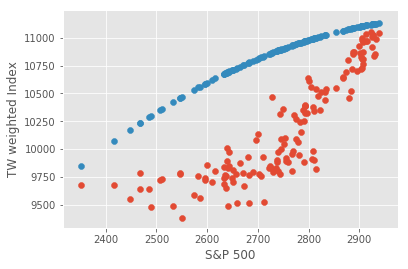

In [39]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_2)
plt.xlabel('S&P 500')
plt.ylabel('TW weighted Index')

Text(0, 0.5, 'TW weighted Index')

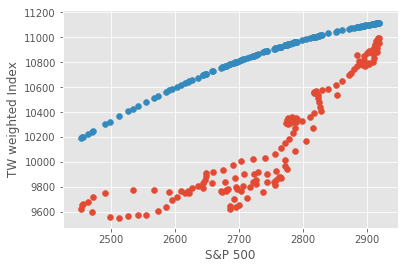

In [40]:
plt.scatter(X_test_rolling_mean_7, y_test_rolling_mean_7)
plt.scatter(X_test_rolling_mean_7, y_pred_rolling_mean_7)
plt.xlabel('S&P 500')
plt.ylabel('TW weighted Index')

In [41]:
print('Prediction score:', pipeline.score(X_train, y_train))

Prediction score: 0.9544110453231313


In [42]:
print('Prediction score:', pipeline_rolling_mean.score(X_train_rolling_mean_7, y_train_rolling_mean_7))

Prediction score: 0.9617833680379289


In [43]:
from sklearn.metrics import explained_variance_score

In [44]:
explained_variance_score(y_test, y_pred_2)

0.5332365332915003

In [45]:
explained_variance_score(y_test_rolling_mean_7, y_pred_rolling_mean_7)

0.5668328485177234